In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

Let's upload our datasets for this analysis

In [76]:
items = pd.read_csv("./files/olist_order_items_dataset.csv")
orders = pd.read_csv("./files/olist_orders_dataset.csv")
pay = pd.read_csv("./files/olist_order_payments_dataset.csv")
products = pd.read_csv("./files/olist_products_dataset.csv")
eng_name = pd.read_csv("./files/product_category_name_translation.csv")

In [77]:
# Let's see our items in transactions
items = pd.read_csv("./files/olist_order_items_dataset.csv")
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [78]:
# Let's evaluate the datatypes and null values
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


We don't have any null values, but some columsn has a datatype as object when it suppose to be datetime. Let's change it

In [79]:
# Change column shipping_limit_date to a datatime Dtype
items['shipping_limit_date'] = pd.to_datetime(items['shipping_limit_date'])
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Great! Now let's evaluate other dataset

In [80]:
# Let's check our orders data
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [81]:
# Let's see the null values and datatypes
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


We can see that some columns don't have the right datatype. Let's change them

In [82]:
# Change object to datatime Dtype
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
orders[date_columns] = orders[date_columns].apply(pd.to_datetime)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Perfect! Now that we have the right datatypes, let's evaluate our null values.

In [83]:
# Let's see our first column with null values that is oder_approved_at
orders[orders['order_approved_at'].isnull()].value_counts('order_status')

order_status
canceled     141
delivered     14
created        5
dtype: int64

As we can see most of them are canceled and created orders, so we can drop them. Created orders as well because doesn't have the dates yet.

In [84]:
# Remove cancel and created orders from our dataset
orders = orders[(orders['order_status'] != 'canceled') & (orders['order_status'] != 'created')]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98811 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98811 non-null  object        
 1   customer_id                    98811 non-null  object        
 2   order_status                   98811 non-null  object        
 3   order_purchase_timestamp       98811 non-null  datetime64[ns]
 4   order_approved_at              98797 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97583 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  98811 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.8+ MB


What about our delivered orders? Let's filter our data to evaluate this datapoints

In [85]:
# Null rows with order_status delivered
orders[orders['order_approved_at'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


We can observe that it is just missing our approved date. We can take the average of other orders and fill it.

In [86]:
# Let's calculate the average of the delivered orders when the customer purchased the product and when the order when approved.
average_difference = (orders['order_approved_at'] - orders['order_purchase_timestamp']).mean()
average_difference


Timedelta('0 days 10:23:53.854246586')

Our mean is around 10 hours, so let's fill this row with this value.

In [87]:
# Fill null values in 'order_approved_at' with the calculated average difference
orders['order_approved_at'].fillna(orders['order_purchase_timestamp'] + average_difference, inplace=True)
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98811 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98811 non-null  object        
 1   customer_id                    98811 non-null  object        
 2   order_status                   98811 non-null  object        
 3   order_purchase_timestamp       98811 non-null  datetime64[ns]
 4   order_approved_at              98811 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97583 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  98811 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.8+ MB


Great! Now we can see the other null values, let's start with order_delivered_customer_date

In [88]:
# Let's see null values from order_delivered_carrier_date
orders[orders['order_delivered_carrier_date'].isnull()].value_counts('order_status')

order_status
unavailable    609
invoiced       314
processing     301
approved         2
delivered        2
dtype: int64

In [89]:
# Let's see those who say unavailable
orders[orders['order_status'] == 'unavailable'].isnull().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     609
order_delivered_customer_date    609
order_estimated_delivery_date      0
dtype: int64

After checking the null values, we see that the two columns don't have the information we need. Let's drop these rows because it's complicated to calculate both columns.

In [90]:
# Remove rows with null values of order_delivered_carrier_date and order_delivered_customer_date
orders = orders[(orders['order_delivered_carrier_date'].notna()) & (orders['order_delivered_customer_date'].notna())]
orders.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 96469 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96469 non-null  object        
 1   customer_id                    96469 non-null  object        
 2   order_status                   96469 non-null  object        
 3   order_purchase_timestamp       96469 non-null  datetime64[ns]
 4   order_approved_at              96469 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96469 non-null  datetime64[ns]
 6   order_delivered_customer_date  96469 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96469 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


Awesome! Now we can continue to our third dataset

In [91]:
# Let's see our payment data
pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


## Exploratory Data Analysis

In [92]:
# drop unwanted column in items_name_list 
columns_to_drop = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

products.drop(columns=columns_to_drop, inplace=True)


In [93]:
# lets merge items and items_name_list
items = pd.merge(products, items, on='product_id')
items.columns

Index(['product_id', 'product_category_name', 'order_id', 'order_item_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [94]:
# top 10 products that have been sold 
top_products = items.groupby('product_id').agg({
    'product_category_name': 'first',
    'product_id': 'count'
}).rename(columns={'product_id': 'quantity_sold'})

top_products = top_products.sort_values(by='quantity_sold', ascending=False).head(10)

top_products


,product_category_name,quantity_sold
product_id,,
aca2eb7d00ea1a7b8ebd4e68314663af,moveis_decoracao,527
99a4788cb24856965c36a24e339b6058,cama_mesa_banho,488
422879e10f46682990de24d770e7f83d,ferramentas_jardim,484
389d119b48cf3043d311335e499d9c6b,ferramentas_jardim,392
368c6c730842d78016ad823897a372db,ferramentas_jardim,388
53759a2ecddad2bb87a079a1f1519f73,ferramentas_jardim,373
d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios,343
53b36df67ebb7c41585e8d54d6772e08,relogios_presentes,323
154e7e31ebfa092203795c972e5804a6,beleza_saude,281


ferramentas_jardim (**garden_tools**) , moveis_decoracao (**furniture_decor**),cama_mesa_banho(**bed_bath_table**)



If you see here, the top product category is garden_tools.

Let's see the prices over time of our most sold product but first we need to merge the datasets items and orders to have the purchased date

In [95]:
# Let's merge our datasets
orders_items = pd.merge(orders, items, on='order_id')
# Let's see how many items were sold by year
orders_items['order_purchase_year'] = orders_items['order_purchase_timestamp'].dt.year
orders_items['order_purchase_year'].value_counts()

2018    60318
2017    49553
2016      317
Name: order_purchase_year, dtype: int64

We can see that 2016 doesn't have enough data comparing to other years, let's remove these and have just with full year

In [96]:
# Remove 2016 from our dataset
orders_items = orders_items[orders_items['order_purchase_year'] != 2016]

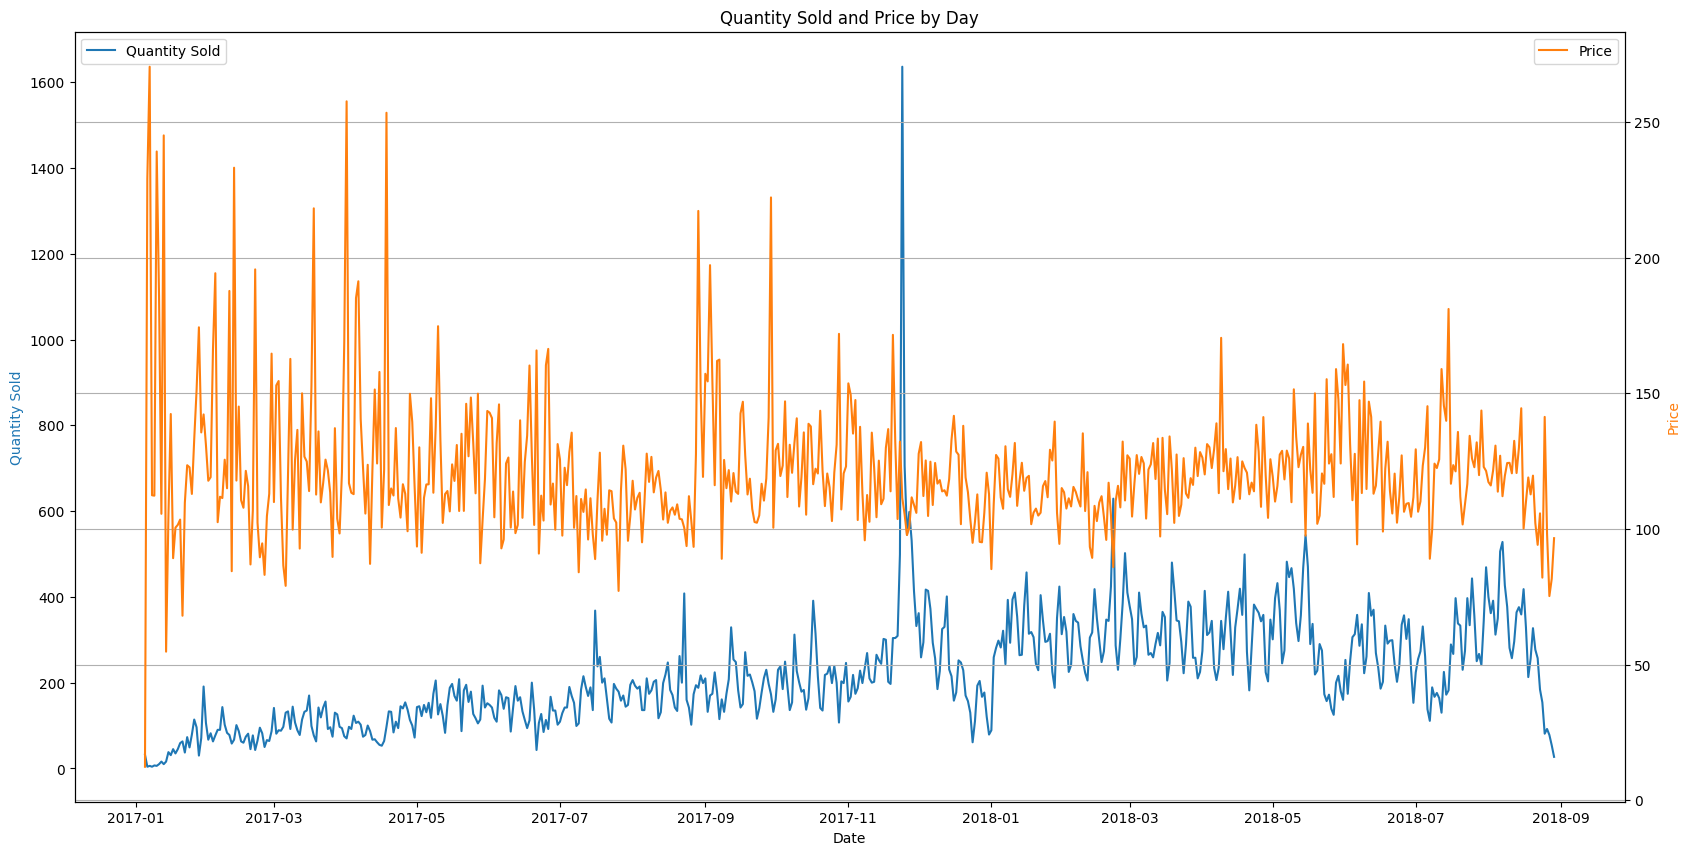

In [97]:
import matplotlib.pyplot as plt

# Group data by day and calculate sum of quantity sold and mean price
daily_sales = orders_items.groupby(orders_items['order_purchase_timestamp'].dt.date).agg({'price': 'mean', 'freight_value': 'mean', 'order_item_id': 'sum'}).reset_index()

# Let's change the name of the columns order_item_id to quantity_sold and order_purchase_timestamp to date
daily_sales.rename(columns={'order_item_id': 'quantity_sold', 'order_purchase_timestamp': 'date'}, inplace=True)

# Specify the figure size (width, height) in inches
plt.figure(figsize=(20, 10))  # Adjust the size as needed

# Create two subplots with the shared x-axis
ax1, ax2 = plt.subplot(), plt.subplot()

# Plot quantity sold (quantity_sold) using the first y-axis (ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Quantity Sold', color='tab:blue')
ax1.plot(daily_sales['date'], daily_sales['quantity_sold'], color='tab:blue', label='Quantity Sold')

# Create a second y-axis (ax2) and plot price using it
ax2 = ax1.twinx()  # share the same x-axis
ax2.set_ylabel('Price', color='tab:orange')
ax2.plot(daily_sales['date'], daily_sales['price'], color='tab:orange', label='Price')

# Add legends to the plot
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Customize the appearance of the plot
plt.title('Quantity Sold and Price by Day')
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.show()


In [98]:
import pandas as pd
import plotly.express as px

# Assuming 'daily_sales' is your DataFrame with columns 'date', 'quantity_sold', and 'price'

fig = px.line(daily_sales, x='date', y=['quantity_sold', 'price'], labels={'quantity_sold': 'Quantity Sold', 'price': 'Price'})

fig.update_layout(
    title='Quantity Sold and Price by Day',
    xaxis_title='Date',
    yaxis_title='Quantity Sold and Price',
    xaxis=dict(tickangle=45),
    yaxis2=dict(overlaying='y', side='right')
)

fig.show()


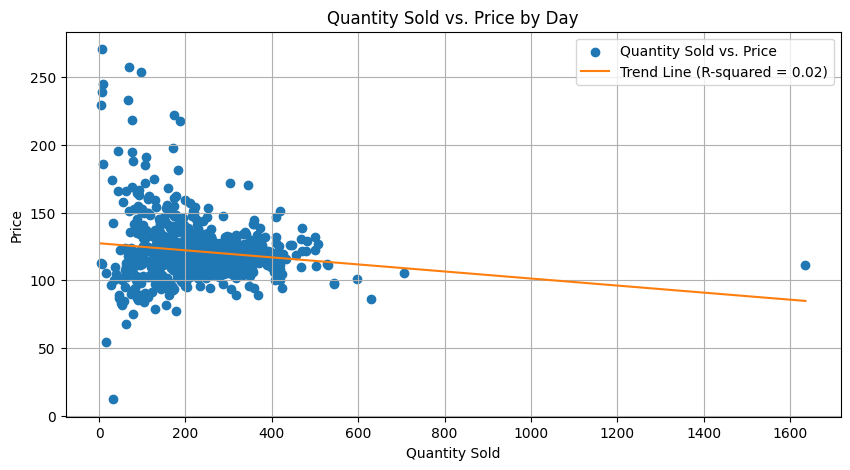

In [99]:

from scipy.stats import linregress

# Group data by day and calculate sum of quantity sold and mean price
daily_sales = orders_items.groupby(orders_items['order_purchase_timestamp'].dt.date).agg({'price': 'mean', 'freight_value': 'mean', 'order_item_id': 'sum'}).reset_index()

# Let's change the name of the columns order_item_id to quantity_sold and order_purchase_timestamp to date
daily_sales.rename(columns={'order_item_id': 'quantity_sold', 'order_purchase_timestamp': 'date'}, inplace=True)

# Create a scatter plot
plt.figure(figsize=(10, 5))  # Adjust the size as needed

# Plot a scatter plot for quantity sold vs. price
plt.scatter(daily_sales['quantity_sold'], daily_sales['price'], label='Quantity Sold vs. Price', color='tab:blue')

# Fit a linear regression line to the data
slope, intercept, r_value, p_value, std_err = linregress(daily_sales['quantity_sold'], daily_sales['price'])

# Calculate the trend line values
trend_line_x = np.array([min(daily_sales['quantity_sold']), max(daily_sales['quantity_sold'])])
trend_line_y = slope * trend_line_x + intercept

# Plot the trend line
plt.plot(trend_line_x, trend_line_y, color='tab:orange', label=f'Trend Line (R-squared = {r_value**2:.2f})')

# Set labels and title
plt.xlabel('Quantity Sold')
plt.ylabel('Price')
plt.title('Quantity Sold vs. Price by Day')

# Add a legend
plt.legend(loc='upper right')

# Show the plot
plt.grid()
plt.show()


we can observed that most quantity sold in price range 100-150 dollars 

In [100]:
# Filtering the top-selling products in the 'furniture_decor' category.

id = orders_items.loc[orders_items['product_id'] == 'aca2eb7d00ea1a7b8ebd4e68314663af'].groupby(['order_purchase_timestamp', 'price', 'freight_value'])['order_id'].count().reset_index()
# Now let's change the name of the columns as date and quantity_sold
id = id.rename(columns={'order_purchase_timestamp': 'date', 'order_id': 'quantity_sold'})
# Let's add the year and moth to the dataset so we can match with our cci_values dataset
id['month'] = id['date'].dt.strftime('%Y-%m')
# Let's set the date as the index

id.head()



,date,price,freight_value,quantity_sold,month
0,2017-07-25 10:50:22,75.0,13.08,1,2017-07
1,2017-07-28 14:20:19,75.0,20.02,1,2017-07
2,2017-07-28 15:56:14,75.0,20.02,1,2017-07
3,2017-07-29 13:22:44,75.0,13.08,2,2017-07
4,2017-08-01 13:11:47,75.0,13.08,3,2017-08


In [101]:
id.shape

(425, 5)

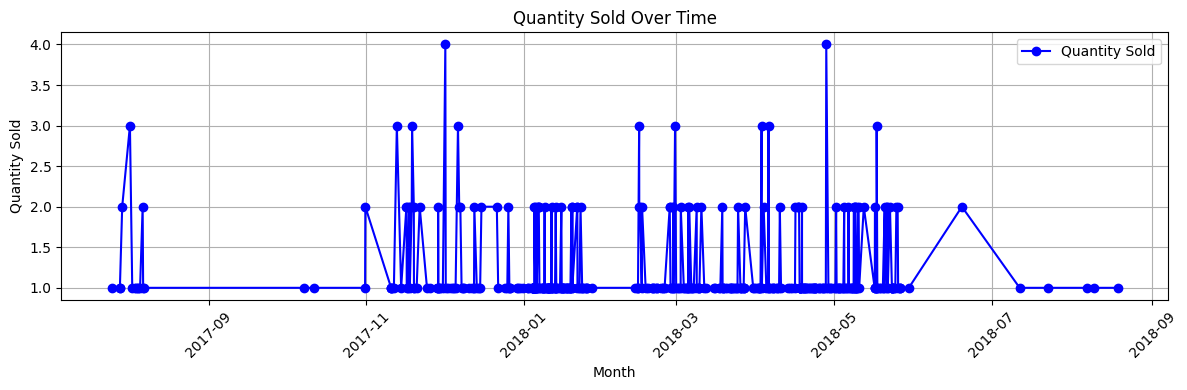

In [102]:
import matplotlib.pyplot as plt

# Assuming you have already prepared the 'id' DataFrame as described in your code

# Group data by month and calculate the sum of quantity sold
monthly_sales = id.groupby('date')['quantity_sold'].sum().reset_index()

# Create a figure and axis
plt.figure(figsize=(12, 4))
ax = plt.subplot()

# Plot the quantity sold over time
ax.plot(monthly_sales['date'], monthly_sales['quantity_sold'], marker='o', linestyle='-', color='b', label='Quantity Sold')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold Over Time')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [103]:
# Let's upload our datasets, Let's start with the Consumer Condifex Index, Inflation rate and unemployment rate
cci = pd.read_csv("./files/cci_brazil.csv")
inflation = pd.read_csv("./files/inflation_brazil.csv")
unemployment = pd.read_csv("./files/unem_br.csv")
# Let's filer all data to have just from Brazil
cci = cci.loc[cci['LOCATION'] == 'BRA']
inflation = inflation.loc[inflation['LOCATION'] == 'BRA']

In [104]:
# Let's change some column names to match with daily_sales
cci = cci.rename(columns={'Value': 'cci_value', 'TIME': 'date'})
inflation = inflation.rename(columns={'Value': 'inflation_value', 'TIME': 'date'})
unemployment = unemployment.rename(columns={' Value': 'unemr_value', 'Date': 'date'})

In [105]:
# Let's change the date format of our datasets
daily_sales['date'] = pd.to_datetime(daily_sales['date'], format='%Y-%m-%d')
cci['date'] = pd.to_datetime(cci['date'], format='%Y-%m-%d')
inflation['date'] = pd.to_datetime(inflation['date'], format='%Y-%m-%d')
#unemployment['date'] = pd.to_datetime(unemployment['date'], format='%d/%m/%y').dt.strftime('%Y-%m-%d')
unemployment['date'] = pd.to_datetime(unemployment['date'], format='%Y-%m-%d')

In [106]:
# Let's save our datasets into csv files with the new date format
cci.to_csv('./files/cci_brazil.csv', index=False)
inflation.to_csv('./files/inflation_brazil.csv', index=False)
unemployment.to_csv('./files/unem_br.csv', index=False)
daily_sales.to_csv('./files/daily_sales.csv', index=False)

In [107]:
# Let's merge our three datasets with daily_sales
daily_sales = pd.merge(daily_sales, cci[['date', 'cci_value']], on='date')
daily_sales = pd.merge(daily_sales, inflation[['date', 'inflation_value']], on='date')
daily_sales = pd.merge(daily_sales, unemployment[['date', 'unemr_value']], on='date')

In [108]:
# Let's add the cci_value to our id dataset but our cci dates is in monthly format so we need to identify the month and year
cci['month'] = cci['date'].dt.strftime('%Y-%m')
unemployment['month'] = unemployment['date'].dt.strftime('%Y-%m')
inflation['month'] = inflation['date'].dt.strftime('%Y-%m')

In [109]:
# Let's merge our datasets
id = pd.merge(id, cci[['month', 'cci_value']], on='month')
id = pd.merge(id, unemployment[['month', 'unemr_value']], on='month')
id = pd.merge(id, inflation[['month', 'inflation_value']], on='month')
# Let's drop the month column
id = id.drop(columns=['month'])
# The last weeks of freight_value are 0, let's fill them with the last value
id['freight_value'] = id['freight_value'].replace(0, 15.550)
id.tail()

,date,price,freight_value,quantity_sold,cci_value,unemr_value,inflation_value
420,2018-07-11 18:26:53,89.9,32.65,1,99.66840,12.3,4.484844
421,2018-07-22 13:09:08,89.9,26.93,1,99.66840,12.3,4.484844
422,2018-08-06 15:21:10,89.9,17.76,1,99.62103,12.1,4.193016
423,2018-08-09 11:07:40,109.9,22.07,1,99.62103,12.1,4.193016
424,2018-08-18 16:37:58,109.9,27.07,1,99.62103,12.1,4.193016


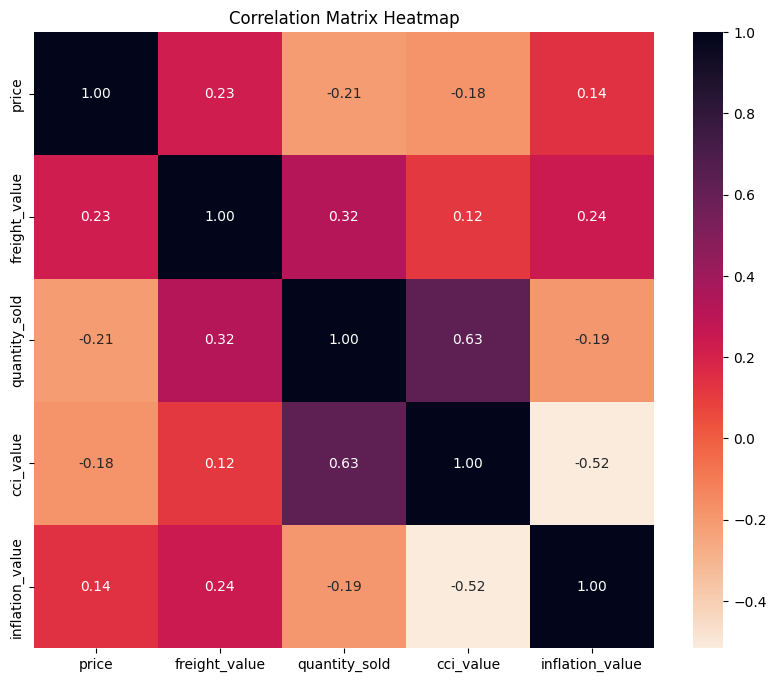

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr = daily_sales.iloc[:, 1:-1].corr()

# Create a figure and axis for the heatmap
plt.figure(figsize=(10, 8))
ax = plt.subplot()

# Create a heatmap using seaborn
sns.heatmap(corr, annot=True, cmap='rocket_r', fmt='.2f', ax=ax)

# Set the title of the heatmap
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()


In [ ]:
# Let's save our data already processed
id.to_csv('./files/furniture_decor_data.csv')